# __Project #5: Can we predict whether a Hotel Booking will be cancelled?__

###__CSE 351 Sungjun Lee (#110743837), Tim Kim (#110887867)__

### __Project instruction__
When it comes to hotel bookings, customers have a variety of options and deals and are sometimes often cancelling certain bookings for several reasons. Given hotel booking data for two major hotels, can we predict whether a customer will cancel the booking or not? We will explore the main concepts of EDA and modelling classification algorithms in this project.

### __Datasets:__

The "Hotel_Bookings.zip" file contains the dataset to be used for this project and a file describing the various columns in the data. You must split the dataset yourself into training, testing, and cross validation data(when required).

### __EDA (10 points):__

Get familiar with the dataset and decide what features and observations will be useful. Make good use of visualizations. Specific tasks may include but are not limited to:

1. Which country saw the most hotel bookings according to the data?

1. What is the distribution like for both hotels with respect to price of a room per night?

1. Which months are the most busy for both hotels? Which months see the most expensive per night costs?

1. Which months see the most cancellations for both hotels?

1. Examine distributions of bookings vs market segment.

1. Which room type was most commonly booked? Most commonly cancelled?

1. What percentage of the data recorded cancellations for each hotel?

### __Modeling and Question Answering (10 points):__

Apply three machine learning algorithms to predict whether or not a customer will cancel a booking. Train your models on the training set, and make predictions for the test set with the "is_canceled" and "reservation_status" columns dropped. Evaluate the accuracy of your predictions. If your predictions are not so accurate, what do you think is the reason? Use other evaluation metrics to evaluate your models (Precision, Recall, F-score). Split the data further to include a cross validation set. Did this improve your model's performance on the test set?

### __Project Report (10 points):__

You are required to document your project, which can be included in the notebook itself. Don't forget to include the team members contribution information in the documentation. Include visualizations to prove your point. You should prepare a powerpoint presentation, which can help you during the demo.

### __Demo (5 points):__

Sign up for a Zoom session with the mentor to present your project. All the team members should be present during the demo. Be prepared to answer questions related to your work. You should present your findings for the project, and you should also be able to run your code.

### __Submission:__

Submit the following on Blackboard:

1.  Code in pdf and ipynb format

2.  Project Presentation in Powerpoint format

# 0. Import Libraries

1. sklearn
  - metrics: to evaluate the prediction of models
  - train_test_split: to split the data into train and test dataset
  - LogisticRegression, KNeighborsClassifier: help you build linear regressions and KNN classifiers
1. catboost
  - an algorithm for gradient boosting on decision trees
1. Matplotlib Pyplot
  - to plot and adjust graphs (including seaborn)
1. Seaborn
  - to plot more attractive graphs than normal Matplotlib
1. Pandas
  - to load and handle the data easily
  

In [36]:
!pip install catboost
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. Taking a look into the data
The data is uploaded to Tim's github repository. It is loaded by pandas.

In [37]:
hotel_data = 'https://raw.githubusercontent.com/timkim0713/hotel-bookings-cancellation-prediction/master/hotel_bookings.csv'
df = pd.read_csv(hotel_data)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Let's see what columns we have for analysis.

In [38]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

We have total 119390 raw row data, and 32 features.

In [39]:
df.shape

(119390, 32)

We have 4 missing data for ```children```, 488 for ```country```, 16340 for ```agent```, and 112593 for ```company```.

In [40]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can use ```.value_counts()``` to see the distribution of the data and fill the missing ```children``` ones.

In [41]:
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Since majority of the data is 0 and we only have 4 missing, we can simply fill them with 0's.

In [42]:
df.children = df.children.fillna(0)
df.children.isnull().sum()

0

For a feature ```agent``` and ```company```, we have 16340 and 112593 missing each, which is a lot to be processed.

In [43]:
df.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [44]:
df.company.value_counts().sort_index()

6.0       1
8.0       1
9.0      37
10.0      1
11.0      1
         ..
531.0     1
534.0     2
539.0     2
541.0     1
543.0     2
Name: company, Length: 352, dtype: int64

One way we can process those huge missing data is to treat it as "unknown." We assume value 0 as unknown ```agent``` and ```company```.

In [45]:
df = df.fillna({"agent": 0, "company": 0})

Now, let's process missing ```country``` feature. Since we only have 488 missing which is small, we can simply drop those rows.

In [46]:
df = df.dropna(subset=["country"])
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

According to a description of the data, undefined values are same as SC. Let's replace them with SC.

In [47]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [48]:
df.meal = df.meal.replace("Undefined", "SC")
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

There are 170 rows with 0 guest, which is impossible. We can also drop those rows since imputing them will be too hard.

In [49]:
df[(df.adults == 0) & (df.children == 0) & (df.babies == 0)][["adults", "children", "babies"]].shape

(170, 3)

In [50]:
df = df[~((df.adults == 0) & (df.children == 0) & (df.babies == 0))]
df[(df.adults == 0) & (df.children == 0) & (df.babies == 0)][["adults", "children", "babies"]].shape

(0, 3)

There are also bookings without any cost. We thought this cannot be normal, and dropped those rows since it won't remove a lot of data.

In [51]:
df[df.adr <= 0].shape

(1800, 32)

In [52]:
df = df[df.adr > 0]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [53]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 1. Which country saw the most hotel bookings according to the data?

Since we have to count the number of bookings with respect to countries, we can count based on the countries.

We summed up countries that are not included in top 10 countries as "OTHER".

In [54]:
most_cnt = df.country.value_counts()
cnt_other = most_cnt[10:].sum()
most_cnt = most_cnt[:9].append(pd.Series([cnt_other], index=["OTHER"]))
most_cnt

PRT      47027
GBR      12052
FRA      10359
ESP       8488
DEU       7246
ITA       3749
IRL       3369
BEL       2334
BRA       2210
OTHER    17999
dtype: int64

Then we can use pie chart to visualize the fraction of the countries.

You can observe that Portugal has the most bookings according to the data.

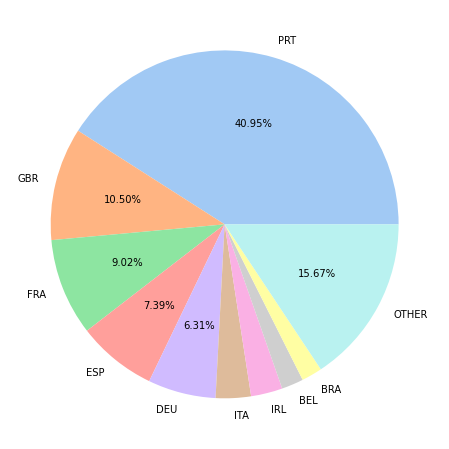

In [55]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(most_cnt, labels=most_cnt.index, autopct = lambda x: format(x, '.2f') + "%" if x > 5 else None, colors=colors)
plt.show()

### 2. What is the distribution like for both hotels with respect to price of a room per night?

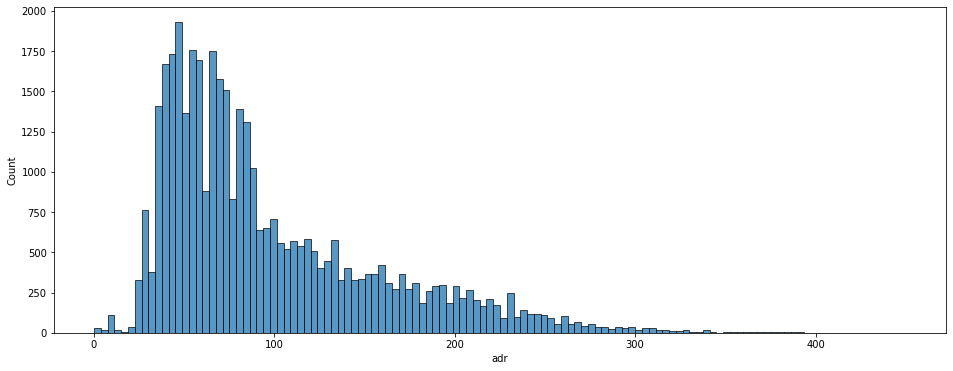

In [56]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df[(df["adr"] < 500) & (df["hotel"] == "Resort Hotel")]["adr"], bins=120)
plt.show()

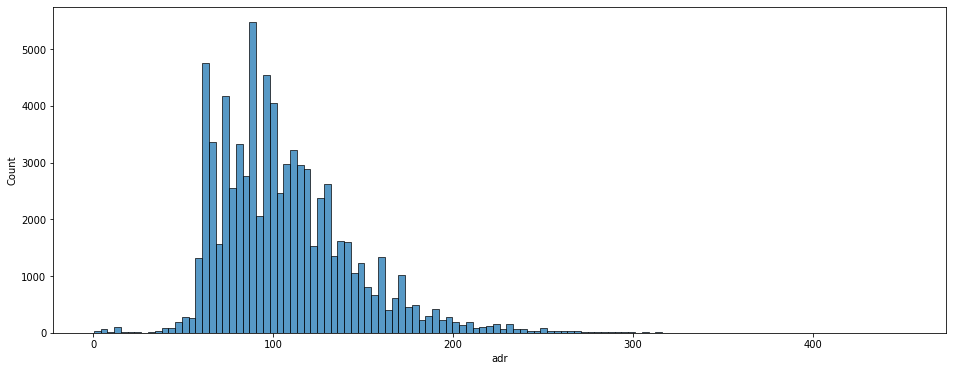

In [57]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df[(df["adr"] < 500) & (df["hotel"] == "City Hotel")]["adr"], bins=120)
plt.show()

### 3. Which months are the most busy for both hotels? Which months see the most expensive per night costs?

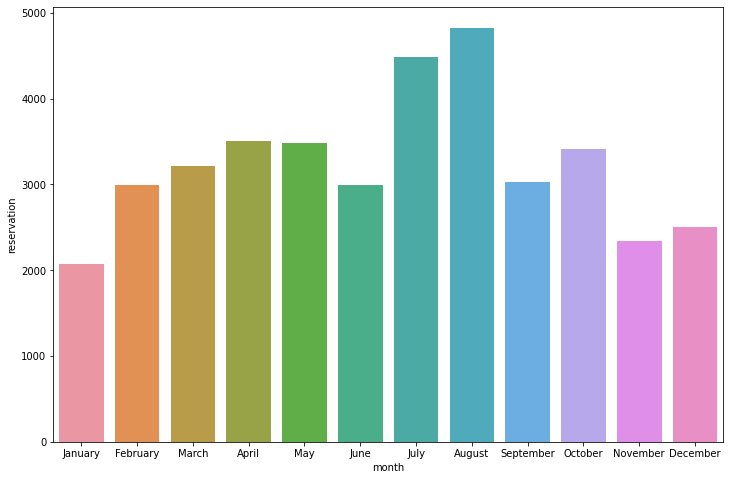

In [58]:
plt.figure(figsize=(12, 8))
busy_month_resort = df[df["hotel"] == "Resort Hotel"].arrival_date_month.value_counts()
busy_month_resort = busy_month_resort.reset_index()
busy_month_resort.columns = ["month", "reservation"]
busy_month_resort["month"] = pd.Categorical(
    busy_month_resort['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    )
sns.barplot(x="month", y="reservation", data=busy_month_resort)
plt.show()

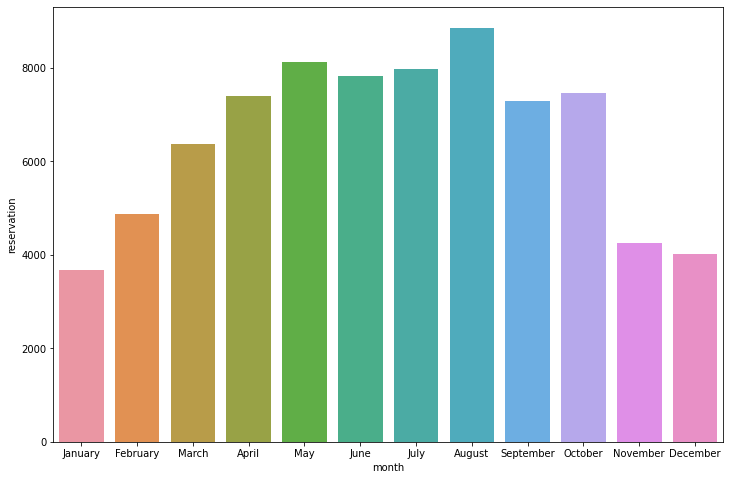

In [59]:
plt.figure(figsize=(12, 8))
busy_month_city = df[df["hotel"] == "City Hotel"].arrival_date_month.value_counts()
busy_month_city = busy_month_city.reset_index()
busy_month_city.columns = ["month", "reservation"]
busy_month_city["month"] = pd.Categorical(
    busy_month_city['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    )
sns.barplot(x="month", y="reservation", data=busy_month_city)
plt.show()

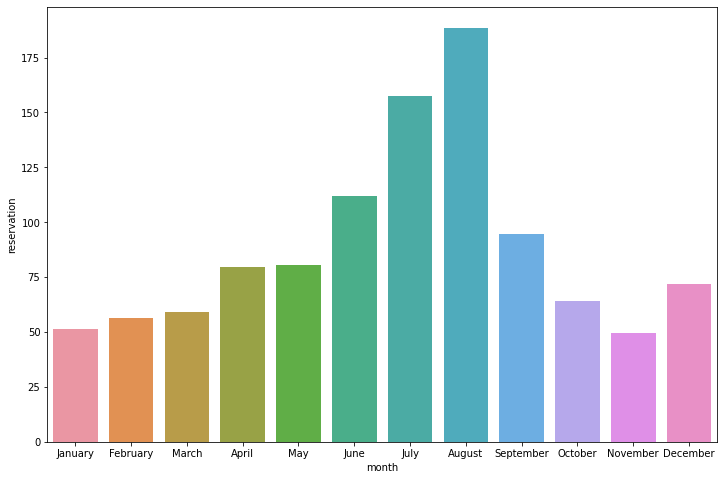

In [60]:
plt.figure(figsize=(12, 8))
expensive_month_resort = df[df["hotel"] == "Resort Hotel"].groupby("arrival_date_month").adr.mean()
expensive_month_resort = expensive_month_resort.reset_index()
expensive_month_resort.columns = ["month", "reservation"]
expensive_month_resort["month"] = pd.Categorical(
    expensive_month_resort['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    )
sns.barplot(x="month", y="reservation", data=expensive_month_resort)
plt.show()


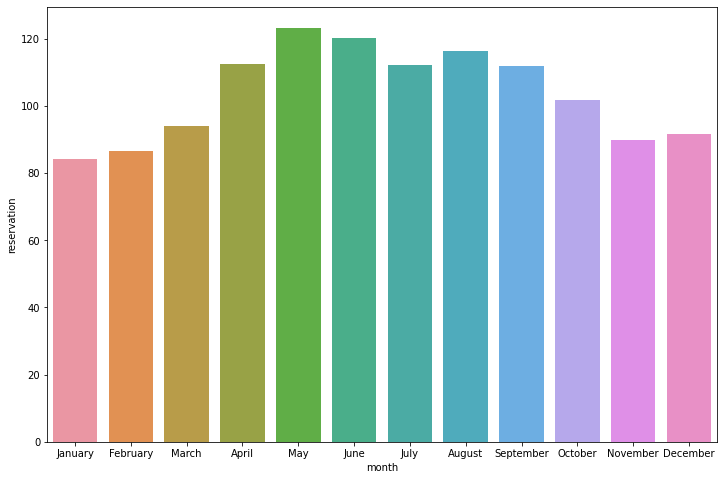

In [61]:
plt.figure(figsize=(12, 8))
expensive_month_city = df[df["hotel"] == "City Hotel"].groupby("arrival_date_month").adr.mean()
expensive_month_city = expensive_month_city.reset_index()
expensive_month_city.columns = ["month", "reservation"]
expensive_month_city["month"] = pd.Categorical(
    expensive_month_city['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    )
sns.barplot(x="month", y="reservation", data=expensive_month_city)
plt.show()


### 4. Which months see the most cancellations for both hotels?
### Should it be absolute value, or cancellation rate?

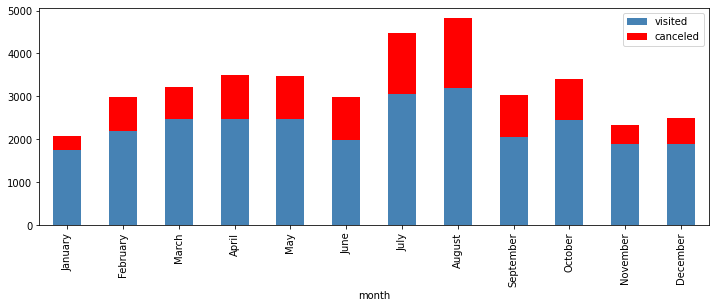

In [62]:
cancel_month_resort = df[df["hotel"] == "Resort Hotel"].is_canceled.value_counts()
cancel_month_resort

cancel_month_resort = df[df["hotel"] == "Resort Hotel"].groupby("arrival_date_month")["is_canceled"].value_counts().unstack()
cancel_month_resort = cancel_month_resort.reset_index()
cancel_month_resort.columns = ["month", "visited", "canceled"]
cancel_month_resort["month"] = pd.Categorical(
    cancel_month_resort['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    )
cancel_month_resort.set_index("month").sort_index().plot(kind="bar", stacked=True, color=['steelblue', 'red'], figsize=(12, 4))
# busy_month = busy_month.reset_index()
# busy_month.columns = ["month", "reservation"]
# busy_month["month"] = pd.Categorical(
#     busy_month['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#     )
# sns.barplot(x="month", y="reservation", data=busy_month)
plt.show()

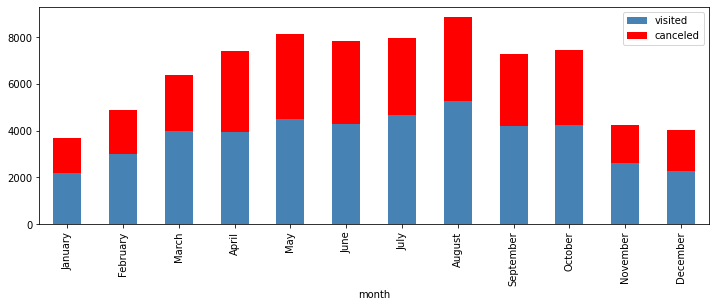

In [63]:
cancel_month_city = df[df["hotel"] == "City Hotel"].is_canceled.value_counts()
cancel_month_city

cancel_month_city = df[df["hotel"] == "City Hotel"].groupby("arrival_date_month")["is_canceled"].value_counts().unstack()
cancel_month_city = cancel_month_city.reset_index()
cancel_month_city.columns = ["month", "visited", "canceled"]
cancel_month_city["month"] = pd.Categorical(
    cancel_month_city['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    )
cancel_month_city.set_index("month").sort_index().plot(kind="bar", stacked=True, color=['steelblue', 'red'], figsize=(12, 4))
# busy_month = busy_month.reset_index()
# busy_month.columns = ["month", "reservation"]
# busy_month["month"] = pd.Categorical(
#     busy_month['month'], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#     )
# sns.barplot(x="month", y="reservation", data=busy_month)
plt.show()

### 5. Examine distributions of bookings vs market segment.

In [64]:
df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Groups',
       'Complementary', 'Undefined', 'Aviation'], dtype=object)

In [65]:
market_ratio = df.market_segment.value_counts()
market_ratio = market_ratio / market_ratio.sum()
market_ratio = market_ratio.reset_index()
market_ratio
# cnt_other = market_ratio[10:].sum()
# market_ratio = market_ratio[:9].append(pd.Series([cnt_other], index=["OTHER"]))
# market_ratio

,index,market_segment
0,Online TA,0.479048
1,Offline TA/TO,0.203777
2,Groups,0.167217
3,Direct,0.104385
4,Corporate,0.043042
5,Aviation,0.001976
6,Complementary,0.000539
7,Undefined,0.000017


### Annotating each bar is kinda tricky...

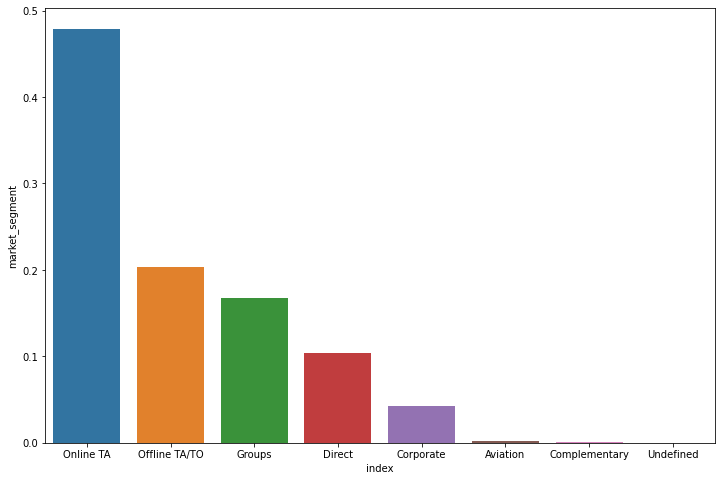

In [66]:
plt.figure(figsize=(12, 8))
sns.barplot(x="index", y="market_segment", data=market_ratio)
plt.show()

### 6. Which room type was most commonly booked? Most commonly cancelled?

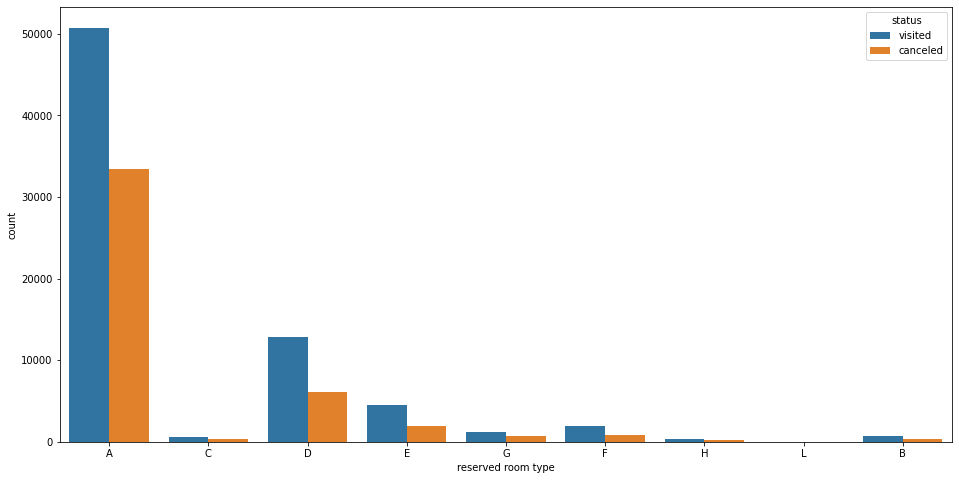

In [67]:
reserved_room = df.loc[:, ["reserved_room_type", "is_canceled"]]
reserved_room.columns = ["reserved room type", "status"]
reserved_room.status = reserved_room.status.map({0:"visited", 1:"canceled"})
plt.figure(figsize=(16, 8))
sns.countplot(x="reserved room type", hue="status", data=reserved_room)
plt.show()

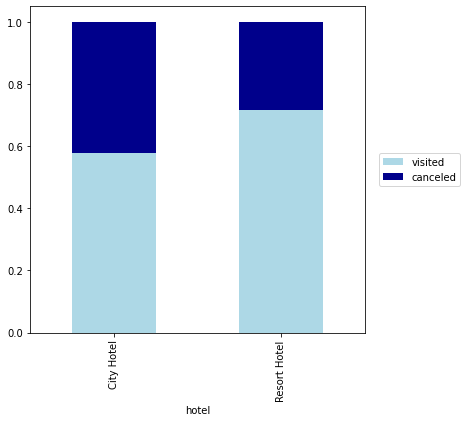

In [68]:
cancelation_by_hotel = df.groupby("hotel")["is_canceled"].value_counts().unstack()
cancelation_by_hotel.columns = ["visited", "canceled"]
cancelation_by_hotel = cancelation_by_hotel.T / cancelation_by_hotel.sum(axis=1)
cancelation_by_hotel.T.reset_index().plot(x="hotel", kind="bar", stacked=True, color=['lightblue', 'darkblue'], figsize=(6, 6))
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

# Modeling and Question Answering

Apply three machine learning algorithms to predict whether or not a customer will cancel a booking. Train your models on the training set, and make predictions for the test set with the "is_canceled" and "reservation_status" columns dropped. Evaluate the accuracy of your predictions. If your predictions are not so accurate, what do you think is the reason? Use other evaluation metrics to evaluate your models (Precision, Recall, F-score). Split the data further to include a cross validation set. Did this improve your model's performance on the test set?

I. Logistic Regression

II. K

III. SVM 

In [69]:
#Data Formatting

# Drop year; not useful as it suggests little value
model_df = df.drop('arrival_date_year', 1)
# Drop day of month; not useful as it suggests little value
model_df = model_df.drop('arrival_date_day_of_month', 1)
# Use Month; convert string month to int
model_df["arrival_date_month"] =pd.to_datetime(model_df['arrival_date_month'], format='%B').dt.month


# Formatting String Columns as Categorical Values
model_df['hotel']= pd.Categorical(model_df["hotel"]).codes
model_df['meal']= pd.Categorical(model_df["meal"]).codes
model_df['country']= pd.Categorical(model_df["country"]).codes
model_df['market_segment']= pd.Categorical(model_df["market_segment"]).codes
model_df['distribution_channel']= pd.Categorical(model_df["market_segment"]).codes
model_df['reserved_room_type']= pd.Categorical(model_df["reserved_room_type"]).codes
model_df['deposit_type']=pd.Categorical(model_df["deposit_type"]).codes
model_df['customer_type']= pd.Categorical(model_df["customer_type"]).codes
model_df['assigned_room_type']= pd.Categorical(model_df["assigned_room_type"]).codes
model_df['reservation_status']= pd.Categorical(model_df["reservation_status"]).codes

# reservation_status_date Date Format to number
model_df['reservation_status_date']= pd.Categorical(model_df["reservation_status_date"]).astype('datetime64').astype(int)
model_df.head()


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,1,0,7,7,27,0,1,1,0.0,0,...,0,0.0,0.0,0,2,75.0,0,0,1,16618
3,1,0,13,7,27,0,1,1,0.0,0,...,0,304.0,0.0,0,2,75.0,0,0,1,16618
4,1,0,14,7,27,0,2,2,0.0,0,...,0,240.0,0.0,0,2,98.0,0,1,1,16619
5,1,0,14,7,27,0,2,2,0.0,0,...,0,240.0,0.0,0,2,98.0,0,1,1,16619
6,1,0,0,7,27,0,2,2,0.0,0,...,0,0.0,0.0,0,2,107.0,0,0,1,16619


In [70]:
## Handling Dataset into training/test dataset

# Drop True / Highly Correlated Values
model_x_df = model_df.drop(['reservation_status', 'is_canceled'], 1)
# model_x_df = model_df.drop('is_canceled', 1)

model_y_df = model_df['is_canceled']
print(model_x_df.shape, model_y_df.shape)

# Cross validation setup
kfold = KFold(n_splits=5, random_state=0, shuffle=True)


x_train,x_test,y_train,y_test=train_test_split(model_x_df, model_y_df,random_state=0,test_size=0.3)



(116932, 28) (116932,)


In [71]:
# Logistic Regression
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)



y_pred_lr = model_1.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf_lr = confusion_matrix(y_test, y_pred_lr)
clf_report_lr = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")


# Output the accuracy. Calculate the mean and std across all folds. 
results = cross_val_score(model_1, x_train, y_train, cv=kfold)
print("[Using Cross Validation] Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))



Accuracy Score of Logistic Regression : 0.7092360319270239
Confusion Matrix : 
[[18882  2933]
 [ 7267  5998]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.72      0.87      0.79     21815
           1       0.67      0.45      0.54     13265

    accuracy                           0.71     35080
   macro avg       0.70      0.66      0.66     35080
weighted avg       0.70      0.71      0.69     35080

[Using Cross Validation] Accuracy: 71.282% (0.179%)


In [72]:
# KNN Classifier

model_2 = KNeighborsClassifier()
model_2.fit(x_train, y_train)

y_pred_knn = model_2.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf_knn = confusion_matrix(y_test, y_pred_knn)
clf_report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN : {acc_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

# Output the accuracy. Calculate the mean and std across all folds. 
knn_results = cross_val_score(model_2, x_train, y_train, cv=kfold)
print("[Using Cross Validation] Accuracy: %.3f%% (%.3f%%)" % (knn_results.mean()*100.0, knn_results.std()*100.0))


Accuracy Score of KNN : 0.8775085518814139
Confusion Matrix : 
[[20291  1524]
 [ 2773 10492]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     21815
           1       0.87      0.79      0.83     13265

    accuracy                           0.88     35080
   macro avg       0.88      0.86      0.87     35080
weighted avg       0.88      0.88      0.88     35080

[Using Cross Validation] Accuracy: 87.485% (0.194%)


In [73]:
model_3 = CatBoostClassifier(iterations=100)
model_3.fit(x_train, y_train)

y_pred_cat = model_3.predict(x_test)
acc_cat = accuracy_score(y_test, y_pred_cat)
conf_cat = confusion_matrix(y_test, y_pred_cat)
clf_report_cat = classification_report(y_test, y_pred_cat)




# Output the accuracy. Calculate the mean and std across all folds. 
catboost_results = cross_val_score(model_3, x_train, y_train, cv=kfold)
print(f"Accuracy Score of CAT Boost Classifier : {acc_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")
print("[Using Cross Validation] Accuracy: %.3f%% (%.3f%%)" % (catboost_results.mean()*100.0, catboost_results.std()*100.0))


Learning rate set to 0.5
0:	learn: 0.4398454	total: 50.4ms	remaining: 4.99s
1:	learn: 0.3951723	total: 76.7ms	remaining: 3.76s
2:	learn: 0.3715659	total: 102ms	remaining: 3.31s
3:	learn: 0.3563860	total: 127ms	remaining: 3.05s
4:	learn: 0.3409006	total: 156ms	remaining: 2.96s
5:	learn: 0.3340164	total: 189ms	remaining: 2.96s
6:	learn: 0.3240200	total: 219ms	remaining: 2.91s
7:	learn: 0.3122259	total: 247ms	remaining: 2.85s
8:	learn: 0.2872423	total: 278ms	remaining: 2.81s
9:	learn: 0.2697495	total: 311ms	remaining: 2.79s
10:	learn: 0.2649051	total: 343ms	remaining: 2.77s
11:	learn: 0.2531033	total: 372ms	remaining: 2.73s
12:	learn: 0.2469693	total: 402ms	remaining: 2.69s
13:	learn: 0.2395636	total: 430ms	remaining: 2.64s
14:	learn: 0.2298426	total: 468ms	remaining: 2.65s
15:	learn: 0.2247505	total: 499ms	remaining: 2.62s
16:	learn: 0.2211832	total: 527ms	remaining: 2.57s
17:	learn: 0.2130375	total: 555ms	remaining: 2.53s
18:	learn: 0.2108299	total: 580ms	remaining: 2.47s
19:	learn: 0.2